<a href="https://colab.research.google.com/github/shuvangiadhikari/Major-Project/blob/main/automatic_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive

drive.mount('/content/drive')

input_folder = '/content/drive/My Drive/Major Project/Preprocessed'
output_folder = '/content/drive/My Drive/Major Project/Augmented'  # Folder to save augmented images

import cv2
import os
import numpy as np
import random
from google.colab.patches import cv2_imshow


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Image loaded successfully!


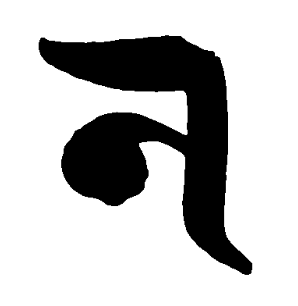

Image size: (306, 298)


In [14]:


# Loading image
Image = cv2.imread("/content/drive/My Drive/Major Project/Preprocessed/na.png")

if Image is None:
    print("Error: Could not load image.")
else:
    print("Image loaded successfully!")
    cv2_imshow(Image)

# Converting image to grayscale
Image = cv2.cvtColor(Image, cv2.COLOR_BGR2GRAY)

size_info = Image.shape
print("Image size:", size_info)


#Function to resize image
def Resize64(image):
  resized_image = cv2.resize(image, (64, 64))
  return resized_image


In [15]:
#All functions

#Function to resize image
def Resize64(image):
  resized_image = cv2.resize(image, (64, 64))
  return resized_image

#Function to rotate an image without cropping/cutting sides.
def ModifiedWay(rotateImage, angle=30):

	# Taking image height and width
	imgHeight, imgWidth = rotateImage.shape[0], rotateImage.shape[1]

	# Computing the centre x,y coordinates
	centreY, centreX = imgHeight//2, imgWidth//2

	# Computing 2D rotation Matrix to rotate an image
	rotationMatrix = cv2.getRotationMatrix2D((centreY, centreX), angle, 1.0)

	# Taking out sin and cos values from rotationMatrix
	cosofRotationMatrix = np.abs(rotationMatrix[0][0])
	sinofRotationMatrix = np.abs(rotationMatrix[0][1])

	#Compute new height & width of image
	newImageHeight = int((imgHeight * sinofRotationMatrix) +
						(imgWidth * cosofRotationMatrix))
	newImageWidth = int((imgHeight * cosofRotationMatrix) +
						(imgWidth * sinofRotationMatrix))


	#updating the values of rotation matrix
	rotationMatrix[0][2] += (newImageWidth/2) - centreX
	rotationMatrix[1][2] += (newImageHeight/2) - centreY

	# Perform actual image rotation
	rotatingimage = cv2.warpAffine(
		rotateImage, rotationMatrix, (newImageWidth, newImageHeight), borderValue=(255, 255, 255))

	return rotatingimage

def adjust_brightness(image, brightness_factor=0.7):

    brightened_image = cv2.convertScaleAbs(image, alpha=brightness_factor, beta=0)

    return brightened_image

# Shearing Function (Compress Image)

def shear_image(image, shear_factor=2):

    # Get the dimensions of the original image
    height, width = image.shape[:2]

    # Define the shear matrix
    M = np.array([
        [1, shear_factor, 0],
        [0, 1, 0]
    ], dtype=np.float32)

    # Calculate the new width after shearing
    new_width = width + abs(shear_factor * height)

    # Apply the affine transformation with the adjusted width
    sheared_image = cv2.warpAffine(
        image, M, (int(new_width), height), borderValue=(255, 255, 255)
    )

    return Resize64(sheared_image)

#Function for adding Salt and pepper noise
def salt_noise(img, noise_ratio=0.018):

    img = Resize64(img)  # Resize the image to 64x64
    row, col = img.shape

    total_pixels = row * col
    num_noise_pixels = int(noise_ratio * total_pixels)

    # Adding salt noise (white pixels)
    for _ in range(num_noise_pixels // 2):
        y_coord = random.randint(0, row - 1)
        x_coord = random.randint(0, col - 1)
        img[y_coord, x_coord] = 255  # White pixel

    # Adding pepper noise (black pixels)
    for _ in range(num_noise_pixels // 2):
        y_coord = random.randint(0, row - 1)
        x_coord = random.randint(0, col - 1)
        img[y_coord, x_coord] = 0  # Black pixel

    return img

# Function for adding Gaussian noise

def gaussian_noise(img, mean=0, std_dev=15):

    img = Resize64(img)  # Resize the image to 64x64
    row, col = img.shape

    # Generating Gaussian noise
    gaussian_noise = np.random.normal(mean, std_dev, (row, col))  # Create Gaussian noise

    # Adding Gaussian noise to the image
    noisy_img = img + gaussian_noise

    # Clipping values to stay within valid image pixel range [0, 255]
    noisy_img = np.clip(noisy_img, 0, 255)

    # Converting to unsigned 8-bit integer (standard image format)
    noisy_img = noisy_img.astype(np.uint8)

    return noisy_img


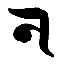

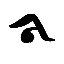

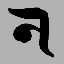

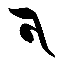

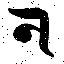

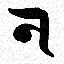

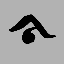

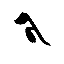

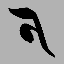

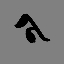

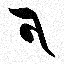

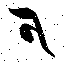

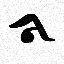

In [16]:
#Function to rotate and dim the image
def rotate_and_brighten_image(image, angle=40, brightness_factor=0.7):

    rotated_image = ModifiedWay(image, angle)
    brightened_image = adjust_brightness(rotated_image, brightness_factor)
    brightened_image = Resize64(brightened_image)

    return brightened_image

#Function to rotate and shear the image

def rotate_and_shear_image(image, angle=20, shear_factor=0.8):

  rotated_image = ModifiedWay(image, angle)
  sheared_image = shear_image(rotated_image, shear_factor)
  sheared_image = Resize64(sheared_image)

  return sheared_image

#Function to shear and dim the image
def shear_and_dim_image(image, shear_factor=0.5, brightness_factor=0.7):

  sheared_image = shear_image(image, shear_factor)
  dimmed_image = adjust_brightness(sheared_image, brightness_factor)
  dimmed_image = Resize64(dimmed_image)

  return dimmed_image

#Function to rotate, shear and dim the image
def rotate_shear_and_dim_image(image, angle=30, shear_factor=0.5):
  rotate_image = ModifiedWay(image,angle)
  sheared_image = shear_image(rotate_image, shear_factor)
  dimmed_image = adjust_brightness(sheared_image, 0.5)

  return dimmed_image

#Function to shear and add gaussian noise
def shear_and_gaussian_noise(image, shear_factor=0.5):

  sheared_image = shear_image(image, shear_factor)
  noisy_image = gaussian_noise(sheared_image)

  return noisy_image

#Function to shear and add salt and pepper noise
def  shear_and_salt_noise(image, shear_factor=0.5, noise_ratio=0.018):
    sheared_image = shear_image(image, shear_factor)
    noisy_image = salt_noise(sheared_image, noise_ratio)

    return noisy_image

#Function to rotateand add gaussian noise
def rotate_and_gaussian_noise(image, angle=30):

    rotated_image = ModifiedWay(image, angle)
    noisy_image = gaussian_noise(rotated_image)

    return noisy_image

#
cv2_imshow(Resize64(Image))
cv2_imshow(Resize64(ModifiedWay(Image, 30)))
cv2_imshow(Resize64(adjust_brightness(Image, 0.7)))
cv2_imshow(Resize64(shear_image(Image, 0.5)))
cv2_imshow(salt_noise(Image))
cv2_imshow(gaussian_noise(Image))
cv2_imshow(rotate_and_brighten_image(Image))
cv2_imshow(rotate_and_shear_image(Image))
cv2_imshow(shear_and_dim_image(Image))
cv2_imshow(rotate_shear_and_dim_image(Image))
cv2_imshow(shear_and_gaussian_noise(Image))
cv2_imshow(shear_and_salt_noise(Image))
cv2_imshow(rotate_and_gaussian_noise(Image))







In [17]:
#Automatically load images from Preprocessed and save it to Augmented

# Paths
preprocessed_folder = "/content/drive/My Drive/Major Project/Preprocessed"
augmented_folder = "/content/drive/My Drive/Major Project/Augmented"

# Ensure output folder exists
os.makedirs(augmented_folder, exist_ok=True)

# Augmentation pipeline using user-defined functions
def apply_augmentations(image):
    augmented_images = [
        rotate_and_brighten_image(image),
        rotate_and_shear_image(image),
        shear_and_dim_image(image),
        rotate_shear_and_dim_image(image),
        shear_and_gaussian_noise(image),
        shear_and_salt_noise(image),
        rotate_and_gaussian_noise(image),
        Resize64(ModifiedWay(image, 30)),
        Resize64(adjust_brightness(image, 0.7)),
        Resize64(shear_image(image, 0.5)),
        salt_noise(image),
        gaussian_noise(image),
        Resize64(image),
    ]
    return augmented_images

# Process images one by one
for filename in os.listdir(preprocessed_folder):
    img_path = os.path.join(preprocessed_folder, filename)
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print(f"Skipping {filename}, could not read the image.")
        continue

    augmented_images = apply_augmentations(image)

    # Save images automatically (without user input)
    save_path = os.path.join(augmented_folder, filename)
    cv2.imwrite(save_path, image)  # Save original

    for i, aug_img in enumerate(augmented_images):
        aug_save_path = os.path.join(augmented_folder, f"{os.path.splitext(filename)[0]}_aug{i+1}.png")
        cv2.imwrite(aug_save_path, aug_img)
        print(f"Saved augmented image to: {aug_save_path}")  # Print confirmation

    print(f"Saved {filename} and its augmentations.")

print("Processing complete.")



Saved augmented image to: /content/drive/My Drive/Major Project/Augmented/gha_aug1.png
Saved augmented image to: /content/drive/My Drive/Major Project/Augmented/gha_aug2.png
Saved augmented image to: /content/drive/My Drive/Major Project/Augmented/gha_aug3.png
Saved augmented image to: /content/drive/My Drive/Major Project/Augmented/gha_aug4.png
Saved augmented image to: /content/drive/My Drive/Major Project/Augmented/gha_aug5.png
Saved augmented image to: /content/drive/My Drive/Major Project/Augmented/gha_aug6.png
Saved augmented image to: /content/drive/My Drive/Major Project/Augmented/gha_aug7.png
Saved augmented image to: /content/drive/My Drive/Major Project/Augmented/gha_aug8.png
Saved augmented image to: /content/drive/My Drive/Major Project/Augmented/gha_aug9.png
Saved augmented image to: /content/drive/My Drive/Major Project/Augmented/gha_aug10.png
Saved augmented image to: /content/drive/My Drive/Major Project/Augmented/gha_aug11.png
Saved augmented image to: /content/drive/